In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hddm
import warnings
warnings.filterwarnings('ignore')

## Prepare our data

In [50]:
data = hddm.load_csv('16MD_18TD_responses.csv')
data = data.rename(columns={'ACC':'response','Subject':'subj_idx','RT':'rt'})
data.rt = data.rt/1000
data = data[data.rt != 0]
data = data.dropna()
stimuli = [stim.split(' ') for stim in list(data.Stimulus)]
difficulty = []
for problem in stimuli:
    if int(problem[0]) == 1 or int(problem[2]) == 1:
        difficulty.append('Simple')
    else:
        difficulty.append('Complex')
data['Difficulty'] = difficulty
data.head()

,subj_idx,Group,response,rt,Stimulus,Condition,Difficulty
0,105,TD,1,1.447,1 + 4 = 5,Add,Simple
1,105,TD,1,1.309,1 + 3 = 4,Add,Simple
2,105,TD,1,1.532,4 + 1 = 6,Add,Simple
3,105,TD,1,2.478,2 + 1 = 1,Add,Simple
4,105,TD,1,2.207,8 + 1 = 11,Add,Simple


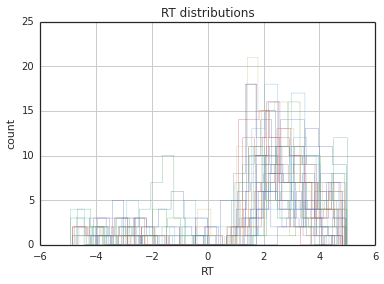

In [63]:
sns.set_style('white')
data = hddm.utils.flip_errors(data) #error RTs are flipped to be negative
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20,histtype='step', ax=ax)

correct add simple
(array(1.9484494253567763), 0.0601760282147797)
(0.15421016184051917, 0.0023258735399951402)


correct add complex
(array(1.4239782684648052), 0.16413157564515662)
(0.10251269281764386, 0.14194167937582999)


correct sub simple
(array(2.8001452114661847), 0.0085893508635947451)
(0.14343700290713621, 0.0071782011349623932)


correct sub complex
(array(2.430737838918296), 0.020851055137430661)
(0.20913200544840793, 0.00010744675933001354)




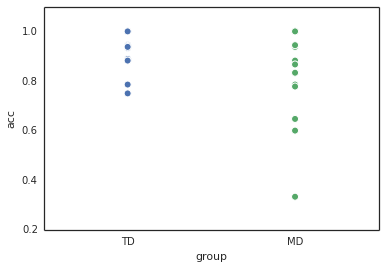

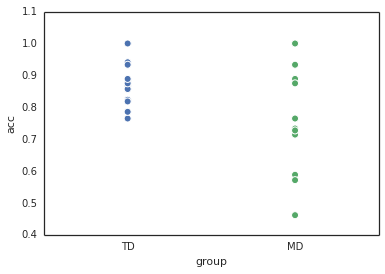

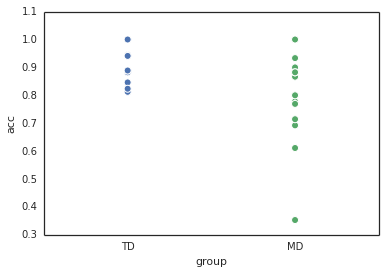

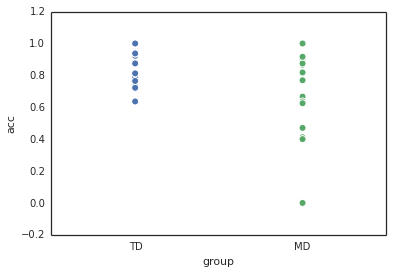

In [67]:
from scipy.stats import ttest_ind, ks_2samp

def rt_differences(td_data,md_data,distribution):
    tds = td_data.subj_idx.unique()
    mds = md_data.subj_idx.unique()
    
    td_rts = [td_data[td_data.subj_idx == td].response.mean() for td in tds]
    md_rts = [md_data[md_data.subj_idx == md].response.mean() for md in mds]

    print(distribution)
    print(ttest_ind(td_rts,md_rts))
    print(ks_2samp(td_data.rt,md_data.rt))
    print("\n")
    
    plt.figure()
    plotvals = [i for j in [td_rts,md_rts] for i in j]
    labels = [i for j in [['TD'] * len(td_rts),['MD'] * len(md_rts)] for i in j]
    plot_data = pd.DataFrame.from_dict({'acc':plotvals,'group':labels})
    sns.stripplot(y='acc',x='group',data=plot_data)
    #sns.distplot(td_data.rt,bins=10)
    #sns.distplot(md_data.rt,bins=10)

correct_data = data[data.rt > 0]
incorrect_data = data[data.rt < 0]

correct_data = data

rt_differences(correct_data[(correct_data.Group == 'TD') & (correct_data.Condition == 'Add') & (correct_data.Difficulty == 'Simple')],
               correct_data[(correct_data.Group == 'MD') & (correct_data.Condition == 'Add') & (correct_data.Difficulty == 'Simple')],
               'correct add simple')

rt_differences(correct_data[(correct_data.Group == 'TD') & (correct_data.Condition == 'Add') & (correct_data.Difficulty == 'Complex')],
               correct_data[(correct_data.Group == 'MD') & (correct_data.Condition == 'Add') & (correct_data.Difficulty == 'Complex')],
               'correct add complex')

rt_differences(correct_data[(correct_data.Group == 'TD') & (correct_data.Condition == 'Sub') & (correct_data.Difficulty == 'Simple')],
               correct_data[(correct_data.Group == 'MD') & (correct_data.Condition == 'Sub') & (correct_data.Difficulty == 'Simple')],
               'correct sub simple')

rt_differences(correct_data[(correct_data.Group == 'TD') & (correct_data.Condition == 'Sub') & (correct_data.Difficulty == 'Complex')],
               correct_data[(correct_data.Group == 'MD') & (correct_data.Condition == 'Sub') & (correct_data.Difficulty == 'Complex')],
               'correct sub complex')


#rt_differences(incorrect_data[incorrect_data.Group == 'TD'],
#               incorrect_data[incorrect_data.Group == 'MD'],
#               'incorrect trials only')

#rt_differences(data[data.Group == 'TD'],
#               data[data.Group == 'MD'],
#               'all trials')



### Run model with parameters dependent upon group and condition

In [26]:
m = hddm.HDDM(data,depends_on={'v':['Group','Condition','Difficulty'],
                               'a':['Group','Condition','Difficulty'],
                               't':['Group','Condition','Difficulty']})
m.find_starting_values()
m.sample(5000, burn=500, dbname='traces.db', db='pickle')
m.save('16md_18td_hddm')

 [-----------------100%-----------------] 5001 of 5000 complete in 66744.8 sec

In [27]:
stats = m.gen_stats()
stats.to_csv('16md_18td_hddm_summary_stats.csv')

Plotting a(Add.Complex.MD)
Plotting a(Add.Complex.TD)
Plotting a(Add.Simple.MD)
Plotting a(Add.Simple.TD)
Plotting a(Sub.Complex.MD)
Plotting a(Sub.Complex.TD)
Plotting a(Sub.Simple.MD)
Plotting a(Sub.Simple.TD)
Plotting a_std
Plotting v(Add.Complex.MD)
Plotting v(Add.Complex.TD)
Plotting v(Add.Simple.MD)
Plotting v(Add.Simple.TD)
Plotting v(Sub.Complex.MD)
Plotting v(Sub.Complex.TD)
Plotting v(Sub.Simple.MD)
Plotting v(Sub.Simple.TD)
Plotting v_std
Plotting t(Add.Complex.MD)
Plotting t(Add.Complex.TD)
Plotting t(Add.Simple.MD)
Plotting t(Add.Simple.TD)
Plotting t(Sub.Complex.MD)
Plotting t(Sub.Complex.TD)
Plotting t(Sub.Simple.MD)
Plotting t(Sub.Simple.TD)
Plotting t_std


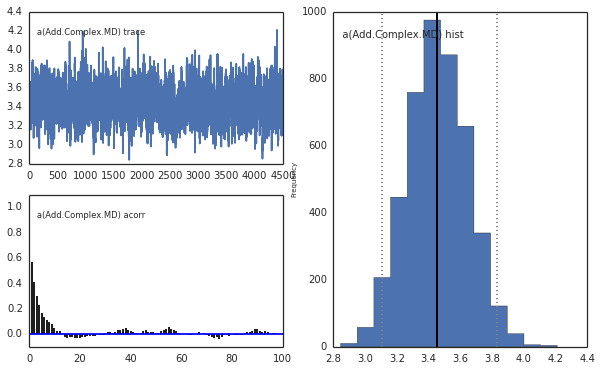

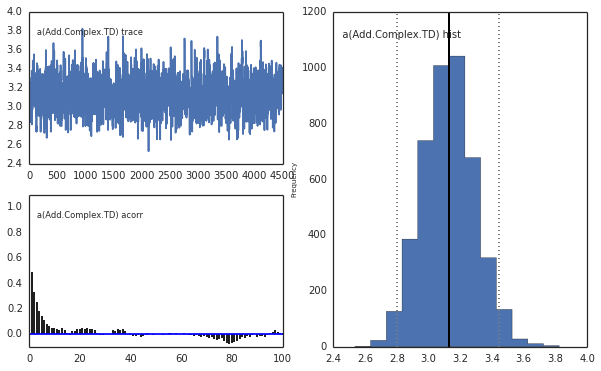

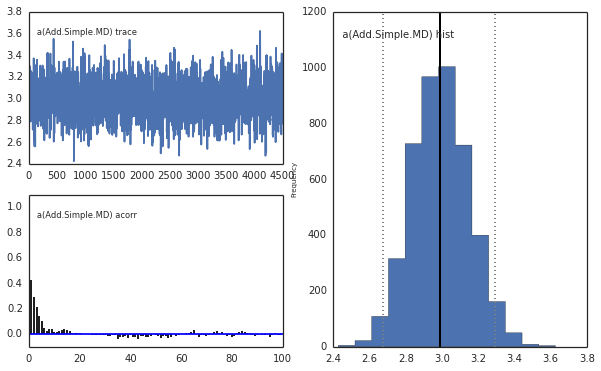

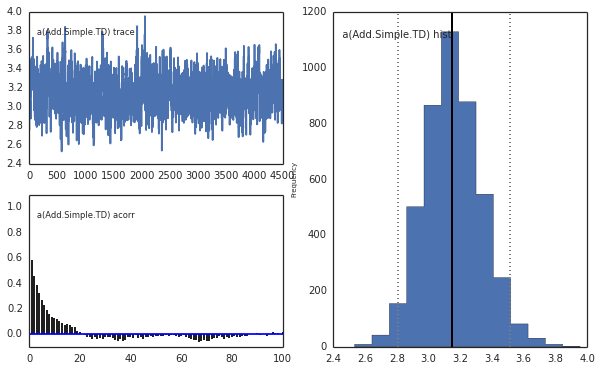

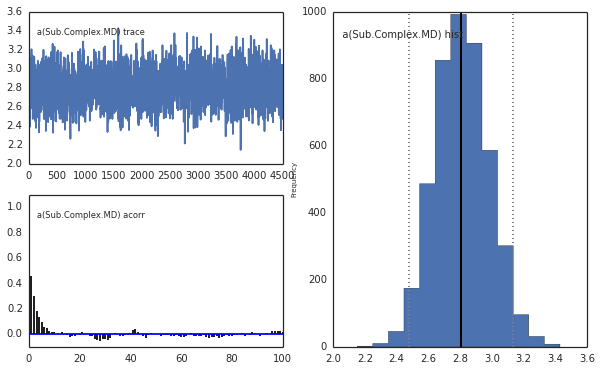

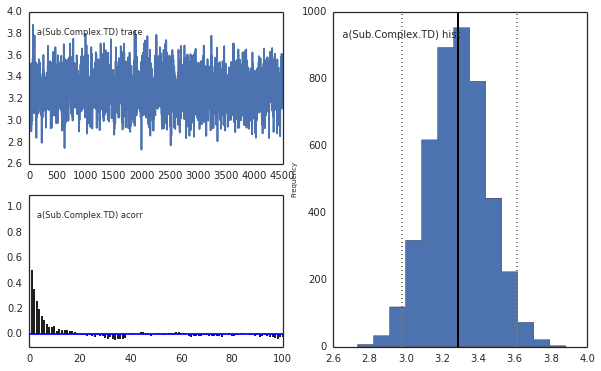

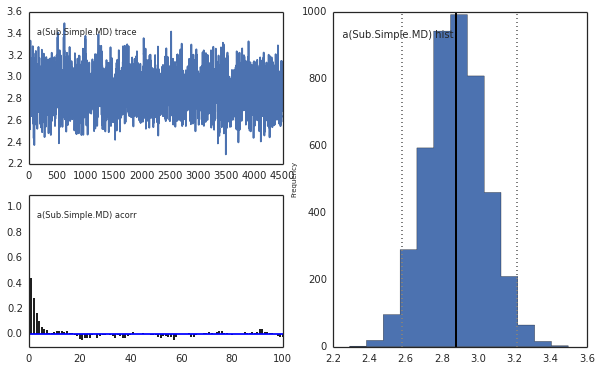

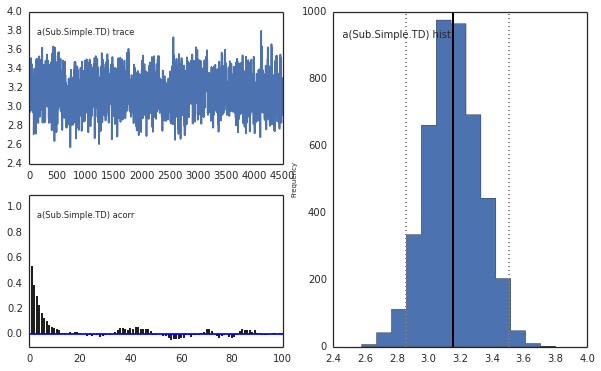

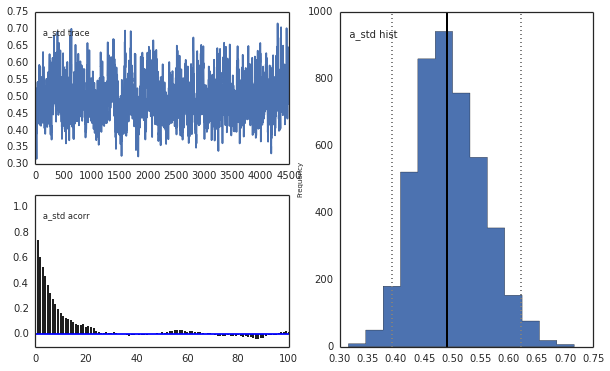

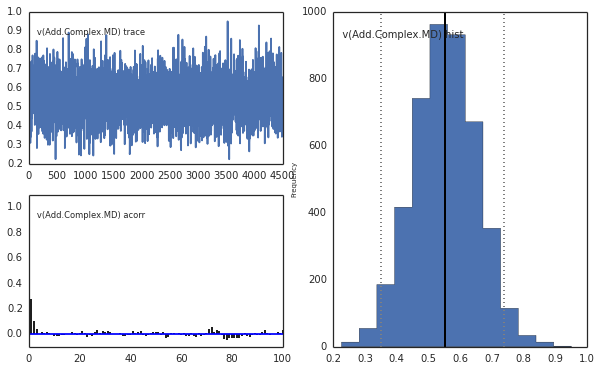

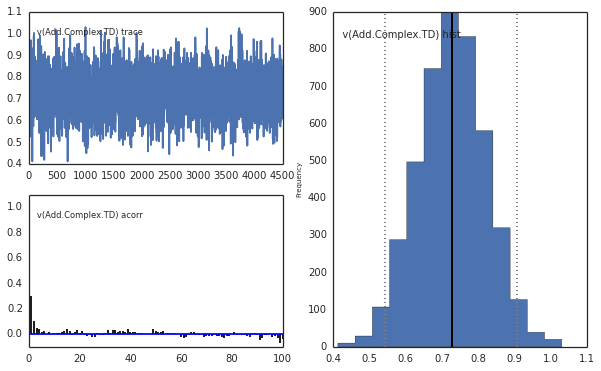

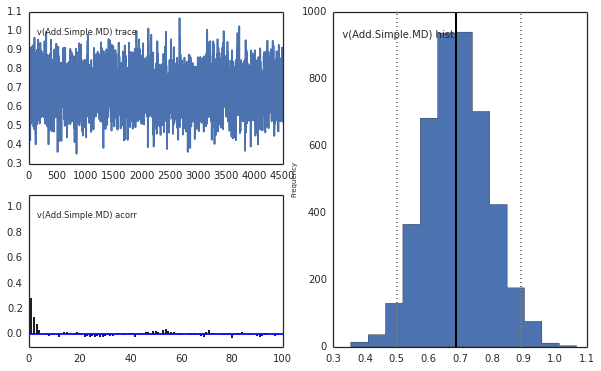

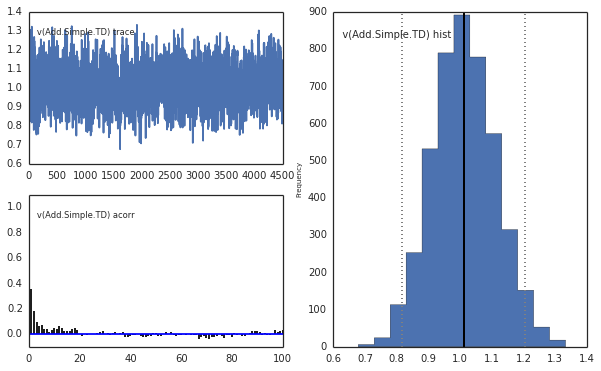

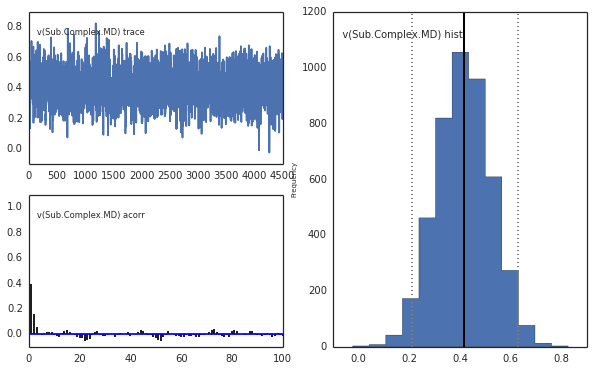

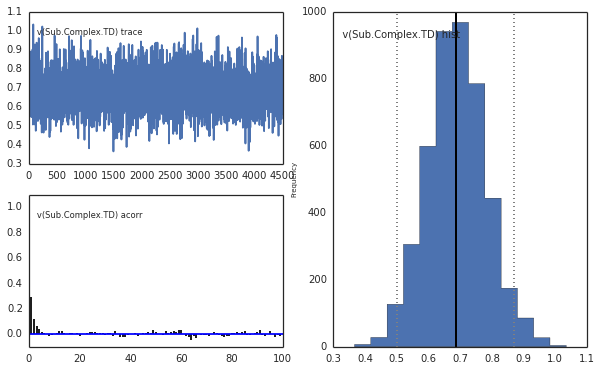

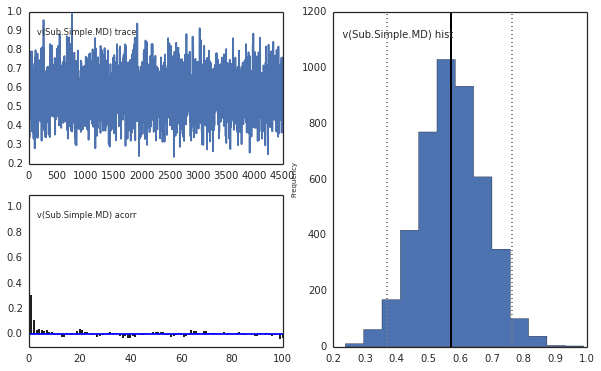

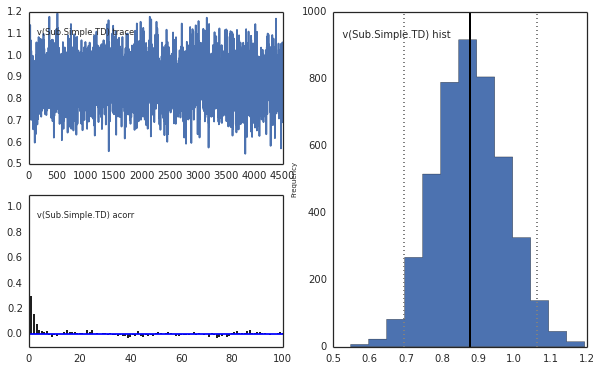

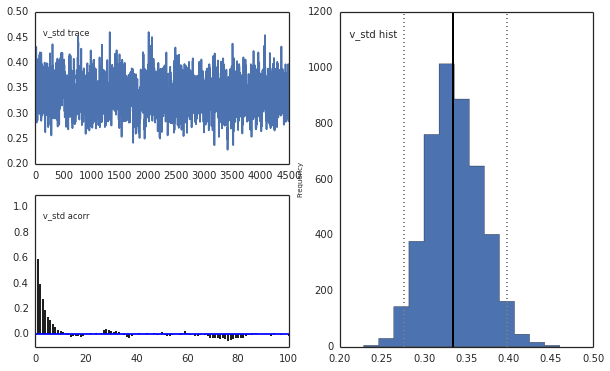

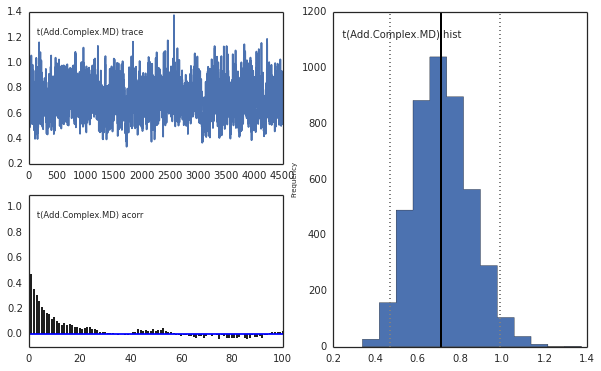

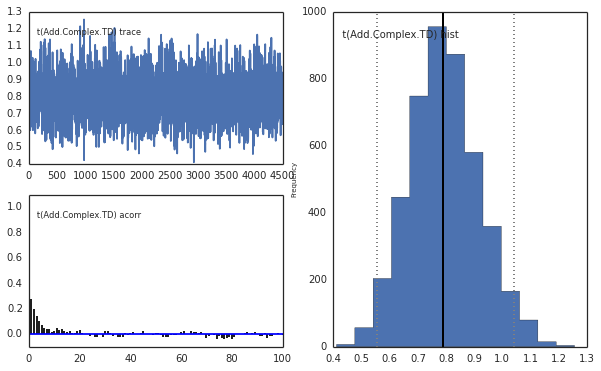

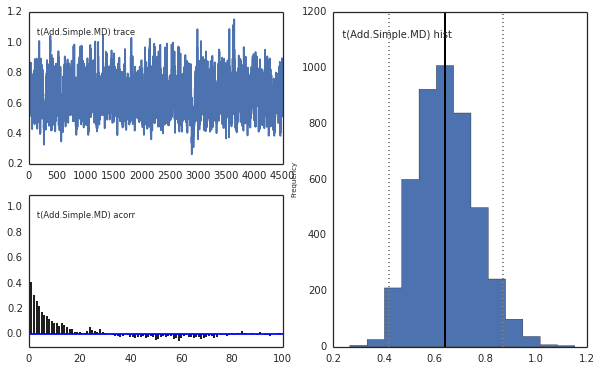

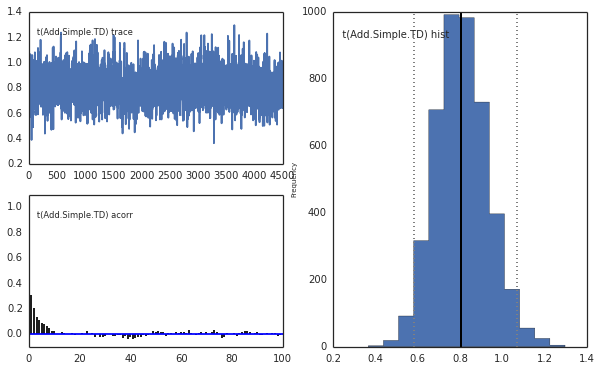

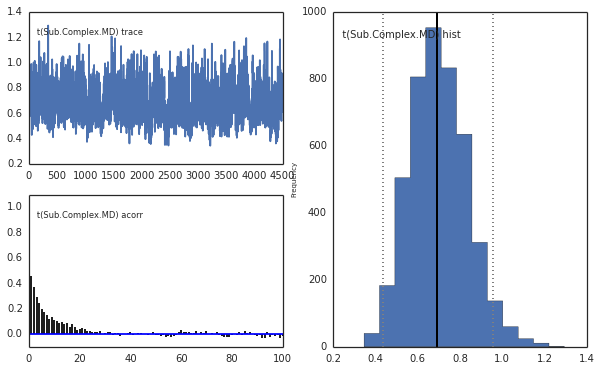

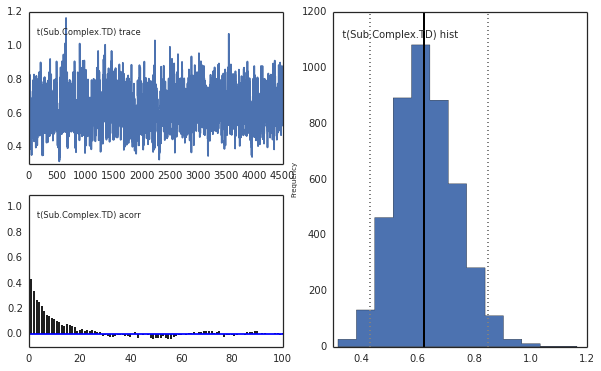

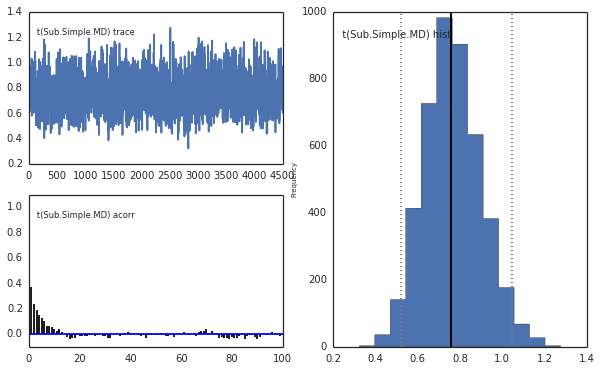

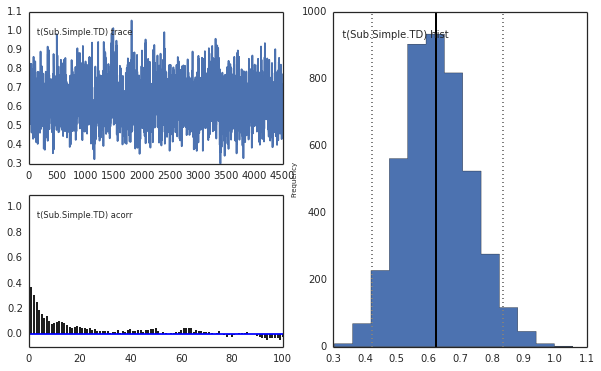

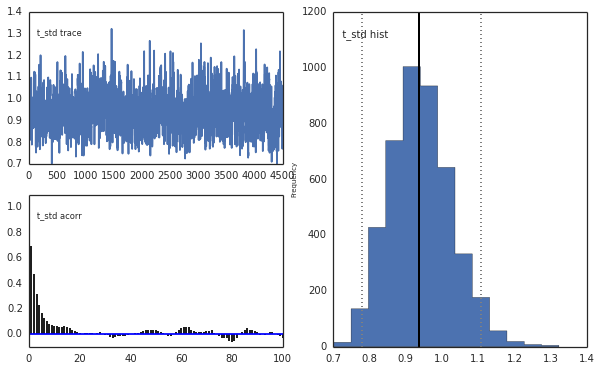

In [28]:
m.plot_posteriors()

P(Add.Complex.TD > Add.Complex.MD) =  0.900222222222
P(Add.Simple.TD > Add.Simple.MD) =  0.988888888889
P(Sub.Complex.TD > Sub.Complex.MD) =  0.974888888889
P(Sub.Simple.TD > Sub.Simple.MD) =  0.988888888889


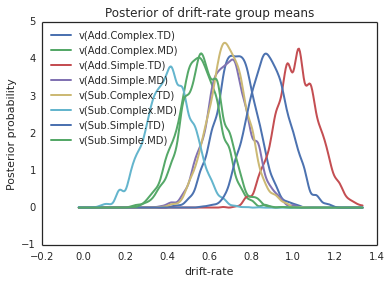

In [30]:
drift_vars = m.nodes_db.node[['v(Add.Complex.TD)', 'v(Add.Complex.MD)',
                              'v(Add.Simple.TD)', 'v(Add.Simple.MD)',
                              'v(Sub.Complex.TD)', 'v(Sub.Complex.MD)',
                              'v(Sub.Simple.TD)', 'v(Sub.Simple.MD)']]
hddm.analyze.plot_posterior_nodes(drift_vars)
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

print "P(Add.Complex.TD > Add.Complex.MD) = ", (drift_vars[0].trace() > drift_vars[1].trace()).mean()
print "P(Add.Simple.TD > Add.Simple.MD) = ", (drift_vars[2].trace() > drift_vars[3].trace()).mean()
print "P(Sub.Complex.TD > Sub.Complex.MD) = ", (drift_vars[4].trace() > drift_vars[5].trace()).mean()
print "P(Sub.Simple.TD > Sub.Simple.MD) = ", (drift_vars[6].trace() > drift_vars[7].trace()).mean()

P(Add.Complex.TD > Add.Complex.MD) =  0.0955555555556
P(Add.Simple.TD > Add.Simple.MD) =  0.750666666667
P(Sub.Complex.TD > Sub.Complex.MD) =  0.977333333333
P(Sub.Simple.TD > Sub.Simple.MD) =  0.883777777778


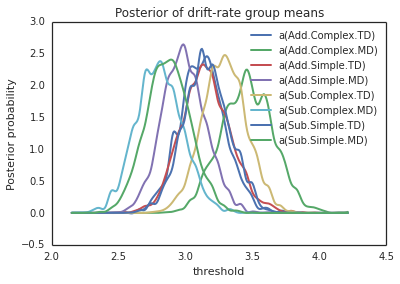

In [32]:
thresh_vars = m.nodes_db.node[['a(Add.Complex.TD)', 'a(Add.Complex.MD)',
                              'a(Add.Simple.TD)', 'a(Add.Simple.MD)',
                              'a(Sub.Complex.TD)', 'a(Sub.Complex.MD)',
                              'a(Sub.Simple.TD)', 'a(Sub.Simple.MD)']]
hddm.analyze.plot_posterior_nodes(thresh_vars)
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

print "P(Add.Complex.TD > Add.Complex.MD) = ", (thresh_vars[0].trace() > thresh_vars[1].trace()).mean()
print "P(Add.Simple.TD > Add.Simple.MD) = ", (thresh_vars[2].trace() > thresh_vars[3].trace()).mean()
print "P(Sub.Complex.TD > Sub.Complex.MD) = ", (thresh_vars[4].trace() > thresh_vars[5].trace()).mean()
print "P(Sub.Simple.TD > Sub.Simple.MD) = ", (thresh_vars[6].trace() > thresh_vars[7].trace()).mean()

P(Add.Complex.TD > Add.Complex.MD) =  0.673777777778
P(Add.Simple.TD > Add.Simple.MD) =  0.839555555556
P(Sub.Complex.TD > Sub.Complex.MD) =  0.337777777778
P(Sub.Simple.TD > Sub.Simple.MD) =  0.192444444444


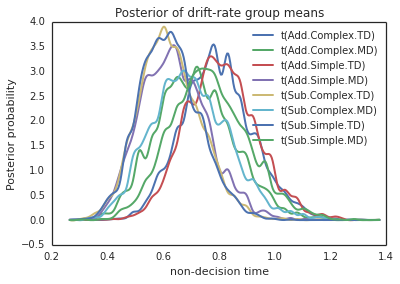

In [35]:
thresh_vars = m.nodes_db.node[['t(Add.Complex.TD)', 't(Add.Complex.MD)',
                              't(Add.Simple.TD)', 't(Add.Simple.MD)',
                              't(Sub.Complex.TD)', 't(Sub.Complex.MD)',
                              't(Sub.Simple.TD)', 't(Sub.Simple.MD)']]
hddm.analyze.plot_posterior_nodes(thresh_vars)
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

print "P(Add.Complex.TD > Add.Complex.MD) = ", (thresh_vars[0].trace() > thresh_vars[1].trace()).mean()
print "P(Add.Simple.TD > Add.Simple.MD) = ", (thresh_vars[2].trace() > thresh_vars[3].trace()).mean()
print "P(Sub.Complex.TD > Sub.Complex.MD) = ", (thresh_vars[4].trace() > thresh_vars[5].trace()).mean()
print "P(Sub.Simple.TD > Sub.Simple.MD) = ", (thresh_vars[6].trace() > thresh_vars[7].trace()).mean()

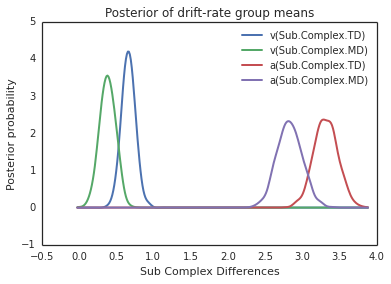

In [39]:
drift_vars = m.nodes_db.node[['v(Sub.Complex.TD)', 'v(Sub.Complex.MD)',
                              'a(Sub.Complex.TD)', 'a(Sub.Complex.MD)']]
hddm.analyze.plot_posterior_nodes(drift_vars)
plt.xlabel('Sub Complex Differences')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')


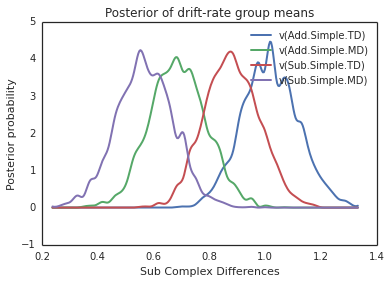

In [47]:
drift_vars = m.nodes_db.node[['v(Add.Simple.TD)', 'v(Add.Simple.MD)',
                              'v(Sub.Simple.TD)', 'v(Sub.Simple.MD)']]
hddm.analyze.plot_posterior_nodes(drift_vars)
plt.xlabel('Sub Complex Differences')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')